<a href="https://colab.research.google.com/github/Chanwoo18/Deeplearning_Practice/blob/main/deeplearning_project_3_MultipleClassification_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Pokemon_data.csv")
df

,pokedex_number,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,base_total,...,against_psychic,against_rock,against_steel,against_water,capture_rate,base_egg_steps,base_happiness,is_legendary,is_mythical,is_mega
0,1,Bulbasaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",0.7,6.9,Grass,Poison,318,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,0
1,2,Ivysaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",1.0,13.0,Grass,Poison,405,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,0
2,3,Venusaur,1,Seed Pokemon,"['Overgrow', 'Chlorophyll']",2.0,100.0,Grass,Poison,525,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,0
3,3,Mega Venusaur,1,Seed Pokemon,['Thick Fat'],2.4,155.5,Grass,Poison,625,...,2.0,1.0,1.0,0.5,45,"5,140",70.0,0,0,1
4,4,Charmander,1,Lizard Pokemon,"['Blaze', 'Solar Power']",0.6,8.5,Fire,None,309,...,1.0,2.0,0.5,2.0,45,"5,140",70.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,902,Basculegion female,8,Big Fish Pokemon,"['Rattled', 'Adaptability', 'Mold Breaker']",3.0,110.0,Water,Ghost,530,...,1.0,1.0,0.5,0.5,NaN,NaN,NaN,0,0,0
1029,903,Sneasler,8,Free Climb Pokemon,"['Pressure', 'Poison Touch']",1.3,43.0,Poison,Fighting,510,...,4.0,0.5,1.0,1.0,NaN,NaN,NaN,0,0,0
1030,904,Overqwil,8,Pin Cluster Pokemon,"['Poison Point', 'Swift Swim', 'Intimidate']",2.5,60.5,Dark,Poison,510,...,0.0,1.0,1.0,1.0,NaN,NaN,NaN,0,0,0
1031,905,Enamorus Incarnate Forme,8,Love-Hate Pokemon,"['Healer', 'Contrary']",1.6,48.0,Fairy,Flying,580,...,1.0,2.0,2.0,1.0,NaN,NaN,NaN,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1033 non-null   int64  
 1   name              1033 non-null   object 
 2   generation        1033 non-null   int64  
 3   classfication     1033 non-null   object 
 4   abilities         1033 non-null   object 
 5   height_m          1033 non-null   float64
 6   weight_kg         1033 non-null   float64
 7   type1             1033 non-null   object 
 8   type2             1033 non-null   object 
 9   base_total        1033 non-null   int64  
 10  hp                1033 non-null   int64  
 11  attack            1033 non-null   int64  
 12  defense           1033 non-null   int64  
 13  sp_attack         1033 non-null   int64  
 14  sp_defense        1033 non-null   int64  
 15  speed             1033 non-null   int64  
 16  against_bug       1033 non-null   float64


In [ ]:
df.isnull().sum().sort_values(ascending=False)

base_happiness      9
base_egg_steps      9
capture_rate        9
pokedex_number      0
against_normal      0
against_fire        0
against_flying      0
against_ghost       0
against_grass       0
against_ground      0
against_ice         0
against_psychic     0
against_poison      0
name                0
against_rock        0
against_steel       0
against_water       0
is_legendary        0
is_mythical         0
against_fighting    0
against_fairy       0
against_electric    0
base_total          0
generation          0
classfication       0
abilities           0
height_m            0
weight_kg           0
type1               0
type2               0
hp                  0
against_dragon      0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
against_bug         0
against_dark        0
is_mega             0
dtype: int64

###### 포켓몬의 분류에는 기본타입으로 노말, 불꽃, 물, 풀, 전기, 얼음, 격투, 독, 땅, 비행, 에스퍼, 벌레, 바위, 고스트, 드래곤, 악, 강철, 페어리가 있습니다
###### 또한 추가타입이 있는데 기본타입만 있는 포켓몬이 있기 때문에 기본타입을 기준으로 분류를 진행하겠습니다
###### classfication은 각 타입에 대한 설명으로 마찬가지로 삭제하였습니다.

In [ ]:
df=df.drop(['type2','classfication'],axis=1)

###### 데이터 확인 결과 pokedex_number 같은 경우 메가진화의 경우 번호가 같아 삭제하였고 name은 인덱스여서 삭제하였고 generation는 포켓몬 세대여서 상관이 없습니다.

###### capture_rate,base_egg_steps,base_happiness,is_legendary,is_mythical,is_mega 또한 타입 분류와 상관이 없어 삭제하였습니다


In [ ]:
df=df.drop(['pokedex_number','name','generation','capture_rate','base_egg_steps','base_happiness','is_legendary','is_mythical','is_mega'],axis=1)

In [ ]:
df

,abilities,height_m,weight_kg,type1,base_total,hp,attack,defense,sp_attack,sp_defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,"['Overgrow', 'Chlorophyll']",0.7,6.9,Grass,318,45,49,49,65,65,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,"['Overgrow', 'Chlorophyll']",1.0,13.0,Grass,405,60,62,63,80,80,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,"['Overgrow', 'Chlorophyll']",2.0,100.0,Grass,525,80,82,83,100,100,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,['Thick Fat'],2.4,155.5,Grass,625,80,100,123,122,120,...,1.0,0.25,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5
4,"['Blaze', 'Solar Power']",0.6,8.5,Fire,309,39,52,43,60,50,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,"['Rattled', 'Adaptability', 'Mold Breaker']",3.0,110.0,Water,530,120,92,65,100,75,...,2.0,2.00,1.0,0.5,0.0,0.5,1.0,1.0,0.5,0.5
1029,"['Pressure', 'Poison Touch']",1.3,43.0,Poison,510,80,130,60,40,80,...,1.0,0.50,2.0,1.0,1.0,0.5,4.0,0.5,1.0,1.0
1030,"['Poison Point', 'Swift Swim', 'Intimidate']",2.5,60.5,Dark,510,85,115,95,65,65,...,0.5,0.50,2.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0
1031,"['Healer', 'Contrary']",1.6,48.0,Fairy,580,74,115,70,135,80,...,1.0,0.50,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abilities         1033 non-null   object 
 1   height_m          1033 non-null   float64
 2   weight_kg         1033 non-null   float64
 3   type1             1033 non-null   object 
 4   base_total        1033 non-null   int64  
 5   hp                1033 non-null   int64  
 6   attack            1033 non-null   int64  
 7   defense           1033 non-null   int64  
 8   sp_attack         1033 non-null   int64  
 9   sp_defense        1033 non-null   int64  
 10  speed             1033 non-null   int64  
 11  against_bug       1033 non-null   float64
 12  against_dark      1033 non-null   float64
 13  against_dragon    1033 non-null   float64
 14  against_electric  1033 non-null   float64
 15  against_fairy     1033 non-null   float64
 16  against_fighting  1033 non-null   float64


In [ ]:
X = df.loc[:, df.columns != 'type1']

In [ ]:
X

,abilities,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,"['Overgrow', 'Chlorophyll']",0.7,6.9,318,45,49,49,65,65,45,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,"['Overgrow', 'Chlorophyll']",1.0,13.0,405,60,62,63,80,80,60,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,"['Overgrow', 'Chlorophyll']",2.0,100.0,525,80,82,83,100,100,80,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,['Thick Fat'],2.4,155.5,625,80,100,123,122,120,80,...,1.0,0.25,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5
4,"['Blaze', 'Solar Power']",0.6,8.5,309,39,52,43,60,50,65,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,"['Rattled', 'Adaptability', 'Mold Breaker']",3.0,110.0,530,120,92,65,100,75,78,...,2.0,2.00,1.0,0.5,0.0,0.5,1.0,1.0,0.5,0.5
1029,"['Pressure', 'Poison Touch']",1.3,43.0,510,80,130,60,40,80,120,...,1.0,0.50,2.0,1.0,1.0,0.5,4.0,0.5,1.0,1.0
1030,"['Poison Point', 'Swift Swim', 'Intimidate']",2.5,60.5,510,85,115,95,65,65,85,...,0.5,0.50,2.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0
1031,"['Healer', 'Contrary']",1.6,48.0,580,74,115,70,135,80,106,...,1.0,0.50,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0


In [ ]:
y = df['type1']
y

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
         ...  
1028     Water
1029    Poison
1030      Dark
1031     Fairy
1032     Fairy
Name: type1, Length: 1033, dtype: object

In [ ]:
y = pd.get_dummies(y)
y

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1030,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


##### abilities는 포켓몬의 능력으로 스킬같은 게념입니다 데이터가 리스트로 되어있어 이를 바꿔주었습니다 확인 결과 스킬의 종류는 총 263개 였습니다

In [ ]:
X_abilites = X['abilities']
X_abilites = pd.DataFrame(X_abilites)
X_abilites['abilities'] = X_abilites['abilities'].str.replace("'", "")
X_abilites['abilities'] = X_abilites['abilities'].str.strip('[]').str.split(', ')
X_abilites


,abilities
0,"[Overgrow, Chlorophyll]"
1,"[Overgrow, Chlorophyll]"
2,"[Overgrow, Chlorophyll]"
3,[Thick Fat]
4,"[Blaze, Solar Power]"
...,...
1028,"[Rattled, Adaptability, Mold Breaker]"
1029,"[Pressure, Poison Touch]"
1030,"[Poison Point, Swift Swim, Intimidate]"
1031,"[Healer, Contrary]"


In [ ]:
X_abilites = X_abilites.explode('abilities')
X_abilites

,abilities
0,Overgrow
0,Chlorophyll
1,Overgrow
1,Chlorophyll
2,Overgrow
...,...
1030,Swift Swim
1030,Intimidate
1031,Healer
1031,Contrary


In [ ]:
list1 = X_abilites['abilities'].unique()
for i in list1:
  X_abilites[i] = X_abilites['abilities'].apply(lambda x: 1 if i in x else 0)
X_abilites

<ipython-input-21-69e77d2ff990>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_abilites[i] = X_abilites['abilities'].apply(lambda x: 1 if i in x else 0)
<ipython-input-21-69e77d2ff990>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_abilites[i] = X_abilites['abilities'].apply(lambda x: 1 if i in x else 0)
<ipython-input-21-69e77d2ff990>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

,abilities,Overgrow,Chlorophyll,Thick Fat,Blaze,Solar Power,Tough Claws,Drought,Torrent,Rain Dish,...,Hunger Switch,Stalwart,Intrepid Sword,Dauntless Shield,Unseen Fist,Transistor,Dragons Maw,Chilling Neigh,Grim Neigh,As One
0,Overgrow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Chlorophyll,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Overgrow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chlorophyll,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Overgrow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,Swift Swim,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,Intimidate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,Healer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,Contrary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
result = X_abilites.groupby(X_abilites.index).sum()
result


<ipython-input-22-aced879c10fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = X_abilites.groupby(X_abilites.index).sum()


,Overgrow,Chlorophyll,Thick Fat,Blaze,Solar Power,Tough Claws,Drought,Torrent,Rain Dish,Mega Launcher,...,Hunger Switch,Stalwart,Intrepid Sword,Dauntless Shield,Unseen Fist,Transistor,Dragons Maw,Chilling Neigh,Grim Neigh,As One
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X.drop(['abilities'],axis=1)

In [ ]:
X

,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,0.7,6.9,318,45,49,49,65,65,45,1.00,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,1.0,13.0,405,60,62,63,80,80,60,1.00,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,2.0,100.0,525,80,82,83,100,100,80,1.00,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,2.4,155.5,625,80,100,123,122,120,80,1.00,...,1.0,0.25,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5
4,0.6,8.5,309,39,52,43,60,50,65,0.50,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3.0,110.0,530,120,92,65,100,75,78,0.50,...,2.0,2.00,1.0,0.5,0.0,0.5,1.0,1.0,0.5,0.5
1029,1.3,43.0,510,80,130,60,40,80,120,0.25,...,1.0,0.50,2.0,1.0,1.0,0.5,4.0,0.5,1.0,1.0
1030,2.5,60.5,510,85,115,95,65,65,85,1.00,...,0.5,0.50,2.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0
1031,1.6,48.0,580,74,115,70,135,80,106,0.25,...,1.0,0.50,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0


In [ ]:
X = pd.concat([X,result],axis=1)
X

,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,against_bug,...,Hunger Switch,Stalwart,Intrepid Sword,Dauntless Shield,Unseen Fist,Transistor,Dragons Maw,Chilling Neigh,Grim Neigh,As One
0,0.7,6.9,318,45,49,49,65,65,45,1.00,...,0,0,0,0,0,0,0,0,0,0
1,1.0,13.0,405,60,62,63,80,80,60,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2.0,100.0,525,80,82,83,100,100,80,1.00,...,0,0,0,0,0,0,0,0,0,0
3,2.4,155.5,625,80,100,123,122,120,80,1.00,...,0,0,0,0,0,0,0,0,0,0
4,0.6,8.5,309,39,52,43,60,50,65,0.50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3.0,110.0,530,120,92,65,100,75,78,0.50,...,0,0,0,0,0,0,0,0,0,0
1029,1.3,43.0,510,80,130,60,40,80,120,0.25,...,0,0,0,0,0,0,0,0,0,0
1030,2.5,60.5,510,85,115,95,65,65,85,1.00,...,0,0,0,0,0,0,0,0,0,0
1031,1.6,48.0,580,74,115,70,135,80,106,0.25,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Columns: 290 entries, height_m to As One
dtypes: float64(20), int64(270)
memory usage: 2.3 MB


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
model = Sequential()
model.add(Dense(300, input_dim=290, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(18, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               87300     
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 60)                9060      
                                                                 
 dense_3 (Dense)             (None, 18)                1098      
                                                                 
Total params: 142,608
Trainable params: 142,608
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath='/content/drive/MyDrive/pokemon.hdf5'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0,save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size = 500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
2/2 [==============================] - 2s 1s/step - loss: 22.7219 - accuracy: 0.0355 - val_loss: 12.3718 - val_accuracy: 0.0870
Epoch 2/2000
2/2 [==============================] - 0s 92ms/step - loss: 11.6261 - accuracy: 0.1163 - val_loss: 12.3277 - val_accuracy: 0.0966
Epoch 3/2000
2/2 [==============================] - 0s 87ms/step - loss: 11.1317 - accuracy: 0.0808 - val_loss: 9.1975 - val_accuracy: 0.0483
Epoch 4/2000
2/2 [==============================] - 0s 106ms/step - loss: 8.2075 - accuracy: 0.0549 - val_loss: 8.3748 - val_accuracy: 0.0676
Epoch 5/2000
2/2 [==============================] - 0s 102ms/step - loss: 7.4468 - accuracy: 0.0775 - val_loss: 6.8841 - val_accuracy: 0.0821
Epoch 6/2000
2/2 [==============================] - 0s 130ms/step - loss: 6.1885 - accuracy: 0.0889 - val_loss: 5.6538 - val_accuracy: 0.0531
Epoch 7/2000
2/2 [==============================] - 0s 133ms/step - loss: 5.1710 - accuracy: 0.0808 - val_loss: 4.9327 - val_accuracy: 0.1111
Epoch 

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,22.721912,0.035541,12.371820,0.086957
1,11.626065,0.116317,12.327710,0.096618
2,11.131670,0.080775,9.197467,0.048309
3,8.207493,0.054927,8.374760,0.067633
4,7.446782,0.077544,6.884078,0.082126
...,...,...,...,...
290,0.192803,0.982229,1.034214,0.710145
291,0.207545,0.966074,1.075496,0.719807
292,0.215281,0.985460,1.027540,0.714976
293,0.198281,0.977383,0.976769,0.739130


In [ ]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

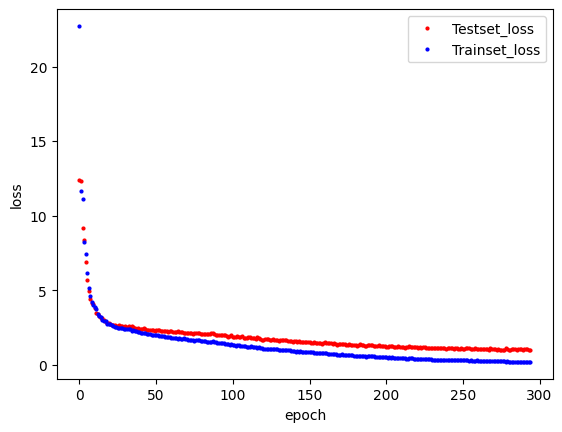

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o",c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o",c="blue", markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
score=model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.7343
